In [1]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
import cv2
from lang_sam import LangSAM
import os
# model = LangSAM()
# image_pil = Image.open('/root/ai/dataset/Training/Type 4/d3aqjrsf8ja61.jpg').convert("RGB")
# model = LangSAM(model_type, sam_checkpoint)
# text_prompt = "poop"
# masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np

def predict_and_plot_image(image_path, text_prompt, model):
    image_pil = Image.open(image_path).convert("RGB")
    masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)
    
    # 마스크 생성 (예시로는 첫 번째 마스크만 사용)
    if masks is not None and len(masks) > 0:
        mask = masks[0]
    else:
        mask = np.zeros((image_pil.height, image_pil.width), dtype=np.uint8)  # 새까만 마스크 생성
    
    return image_pil, mask

In [3]:
sam_checkpoint = "/root/ai/weights/langsam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

dataset_dir = "/root/ai/dataset/Training"  # 실제 데이터셋 경로로 변경
result_dir = "/root/ai/dataset/result"

model = LangSAM(model_type, sam_checkpoint)
print(model)

final text_encoder_type: bert-base-uncased


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [23]:
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

In [32]:
# 예측 및 플롯
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    if not os.path.isdir(category_dir):
        continue
    
    image_paths = [os.path.join(category_dir, f) for f in os.listdir(category_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not image_paths:
        continue
    
    # 결과 저장 디렉토리
    result_category_dir = os.path.join(result_dir, category)
    if not os.path.exists(result_category_dir):
        os.makedirs(result_category_dir)
    
    # 플롯 초기화
    fig, axes = plt.subplots(len(image_paths), 2, figsize=(10, 5 * len(image_paths)))
    
    for idx, image_path in enumerate(image_paths):
        image_pil, mask = predict_and_plot_image(image_path, "poop", model)
        
        axes[idx, 0].imshow(image_pil)
        axes[idx, 0].set_title(f"Original - {os.path.basename(image_path)}")
        axes[idx, 0].axis('off')
        
        if mask is not None:
            axes[idx, 1].imshow(mask, cmap='gray')
            axes[idx, 1].set_title(f"Mask - {os.path.basename(image_path)}")
        else:
            axes[idx, 1].text(0.5, 0.5, 'No Mask', horizontalalignment='center', verticalalignment='center')
        axes[idx, 1].axis('off')
    
    plt.suptitle(f"Predictions for {category}", fontsize=16)
    plt.tight_layout()
    
    # 플롯 저장
    result_path = os.path.join(result_category_dir, f"{category}_predictions.png")
    plt.savefig(result_path)
    plt.close(fig)

In [ ]:
image_pil = Image.open('/root/ai/dataset/Training/Type 4/d3aqjrsf8ja61.jpg').convert("RGB")
model = LangSAM(model_type, sam_checkpoint)
text_prompt = "poop"
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

In [5]:
print(image_pil.size)
print(masks.shape)
# masks, boxes, phrases, logits

(1908, 4032)
torch.Size([1, 4032, 1908])


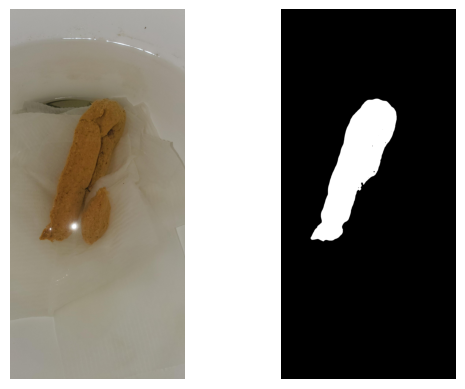

In [9]:
# 텐서를 NumPy 배열로 변환
numpy_array = masks.squeeze().numpy()  # squeeze()를 사용하여 차원 축소

image = cv2.imread('/root/ai/dataset/poo_1-299/train/22_jpeg.rf.8413cc95758dcd3f5107a75ec714e95b.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')  # 축을 숨김

plt.subplot(1, 2, 2)
plt.imshow(numpy_array, cmap='gray')
plt.axis('off')  # 축을 숨김
plt.show()

## Automatic mask generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/root/ai/weights/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

To generate masks, just run `generate` on an image.

In [ ]:
masks = mask_generator.generate(image)